# Рекомендация тарифов

**Задача**

Построить систему, способную предсказать какой тариф подойдет клиенту с точностью предсказания не меньше **75%**

**Описание данных**

- **сalls** — количество звонков,
- **minutes** — суммарная длительность звонков в минутах,
- **messages** — количество sms-сообщений,
- **mb_used** — израсходованный интернет-трафик в Мб,
- **is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0). - **Целевая переменная**

In [2]:
# Импортируем библиотеки, нужные для работы:
import pandas as pd
import numpy as np

In [3]:
# Сохраняем содержимое файла в переменную
df = pd.read_csv('/datasets/users_behavior.csv')

In [4]:
# Выведем основную информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [6]:
# Выведем описательную статистику всех признаков
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


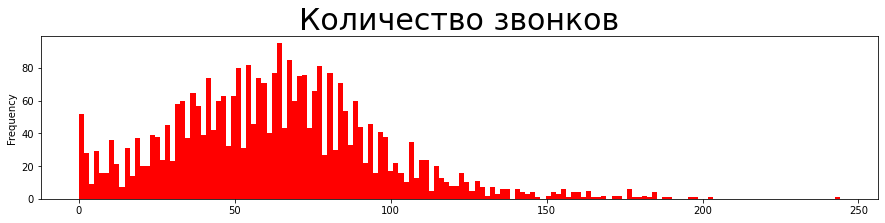

In [7]:
ax = df.calls.plot(kind='hist',bins=150,figsize=(15,3), color='r').set_title('Количество звонков', fontsize = 30)

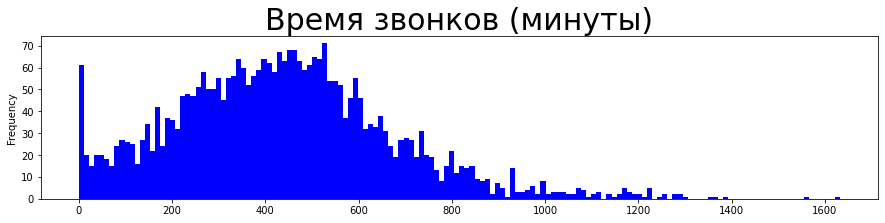

In [8]:
ax = df.minutes.plot(kind='hist',bins=150,figsize=(15,3), color='b').set_title('Время звонков (минуты)', fontsize = 30)

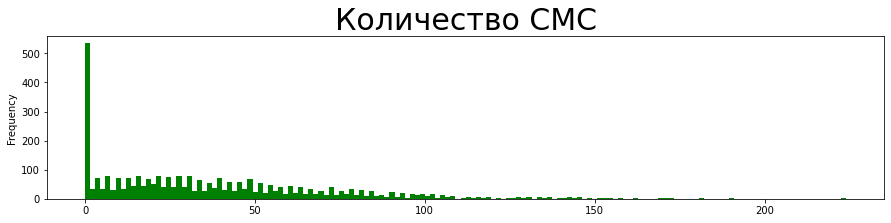

In [9]:
ax = df.messages.plot(kind='hist',bins=150,figsize=(15,3), color='g').set_title('Количество СМС', fontsize = 30)

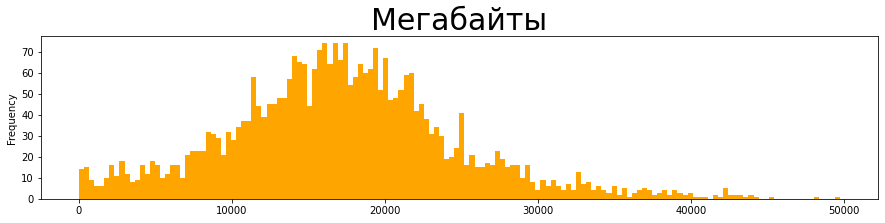

In [10]:
ax = df.mb_used.plot(kind='hist',bins=150,figsize=(15,3), color='orange').set_title('Мегабайты', fontsize = 30)

Глядя на эти графики, можно сделать следующие выводы:
- Звонки, время звонков и мегабайты имеют распределение близко к нормальному
    - Чаще всего клиенты в месяц делают от **40** до **80** звонков
    - Если перевести это во время, то чаще всего разговаривают по телефону от **4** - до **9** часов
    - А также многие используют интернет, основная масса тратит в месяц от **12** – до **21** гб.
- 15% пользователей вообще не используют СМС, что неудивительно, ведь сейчас множество бесплатных сервисов для общения, для которых нужен только интернет. На графике это выделяется большим столбцом на отметке 0.
    - Такие-же характерные нулевые столбцы есть и на звонках, а также на магабайтах (но слабо)
    - Это можно объяснить тем, что некоторые покупают тариф только ради интернета и почти не звонят. Есть и такие кто, наоборот, только звонит, но не использует интернет, но таких меньше
- В каждой операции есть рекордные значения:
    - Кто-то может наговорить целые сутки за месяц
    - Кто-то переслал почти 3 страницы текста через смс
    - Кто то наиграл, или насмотрел видео на 50 гб


Теперь поострим, как распределена целевая переменная:

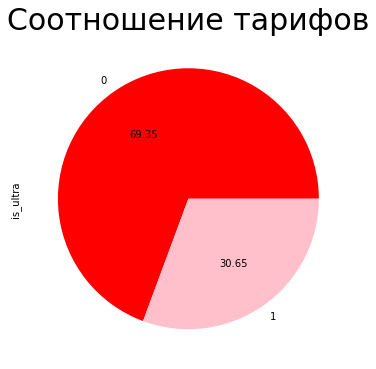

In [11]:
def autopct(pct):
    return ('%.2f' % pct) if pct > 10 else ''

ax = df.is_ultra.value_counts().plot.pie(figsize=(6, 6), autopct=autopct, colors = ['red', 'pink']).set_title('Соотношение тарифов', fontsize = 30)

Как видно, тех кто на тарифе ультра в 2 раза меньше тех, кто на смарт.

Посмотрим на взаимосвязь всех переменных

In [12]:
import seaborn as sns # Для работы с графиками

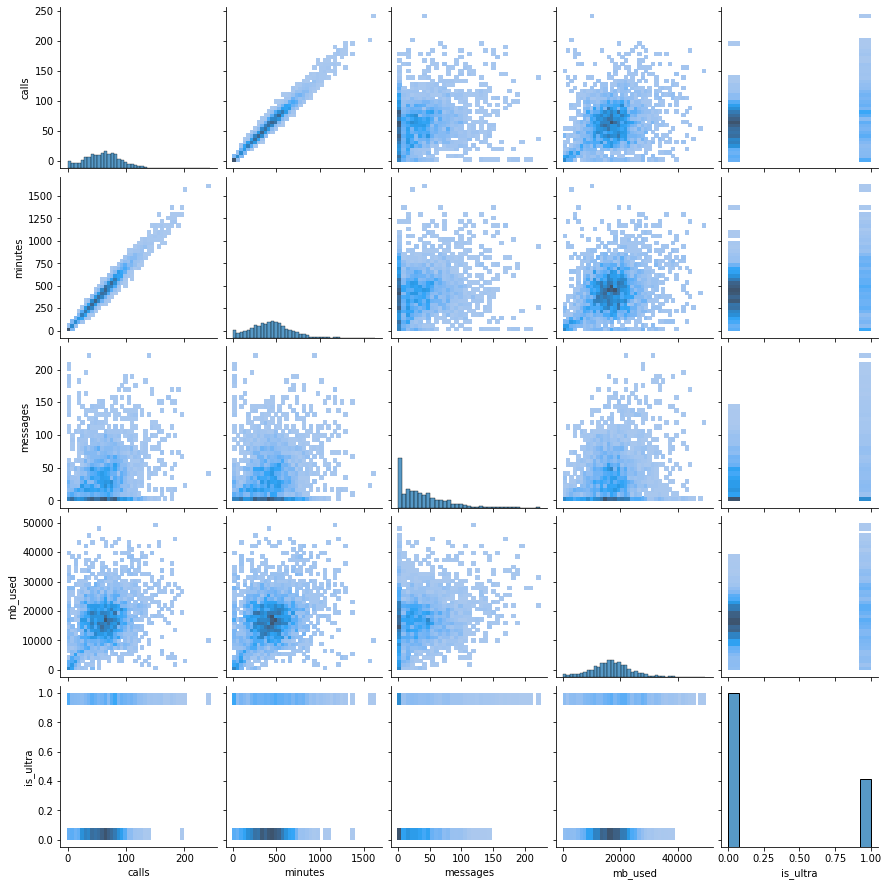

In [13]:
sns.pairplot(df, kind="hist")

In [14]:
# Выведем значения корреляции
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


- Самая высокая корреляция, что очевидно, у количества звонков и общего количества минут. Разброс не сильно большой, это может также говорить о том, что продолжительность одного звонка у многих примерна одинакова
- Вторая, более весомая связь, в почти 30% у мегабайтов и звонков. Скорее всего это связано с нашей теорий озвученной ранее, что кто-то пользуется только интернетом, а кто-то только звонками

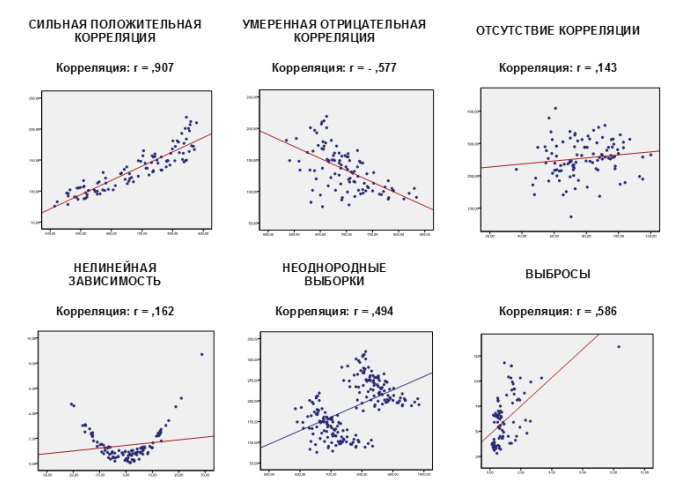

In [15]:
# Импортируем функцию для разделения выборок
from sklearn.model_selection import train_test_split

Обычно, при поиске гиперпараметров используется 3 выборки: **обучающая, валидационая и тестовая**.

Но в процессе использования таких инструментов, как **Greed Search** и **Random Search** стало понятно, что валидационная выборка в них берется автоматически из обучающей.

Поэтому у нас будет только **обучающая и тестовая**, в соотношении **4:1**, т.к. валидационная, идет вместе с обучающей.

Для повторно воспроизводимых результатов эксперимента, **зафиксируем случайность**:

In [16]:
# Т.к. в последующих функциях часто будет использоваться случайность, а нам требуются
# одинаковые результаты при повторении, то зафиксируем определённое значение
seed = 42

In [17]:
# Получим 2 выборки
features_train, features_test, target_train, target_test = \
        train_test_split(df.drop(['is_ultra'], axis=1), df['is_ultra'], test_size=.2, random_state=seed)

In [18]:
# Убедимся, что выборки имеют правильные размеры:
print(f'train features={len(features_train)} target={len(target_train)}')
print(f'test features={len(features_test)} target={len(target_test)}')

train features=2571 target=2571
test features=643 target=643


Т.к. мы собираемся предсказывать значение целевой переменной **is_ultra**, значения которой могут быть либо **1** либо **0**, то это относится к задаче **бинарной классификации**.

Рассмотрим алгоритмы классификации:
- Решающее дерево
- Случайный лес
- Логистическая регрессия

А также другие модели для классификации.

Также рассмотрим:
- Машины опорных векторов
- Нейронные сети
- Catboost

*В рамках ограниченных временных ресурсах, нет возможности изучить влияние каждого гиперпарматетра у новых моделей, в следствии чего для перебора будут использованы те, которые удалось найти и перебор которых не занимает очень много времени.*

Для поиска лучших гиперпарметров, будет использован алгоритм «**поиска по сетке**» (**GridSearchCV**)
который сильно упрощает этот процесс

Также, помимо точности, нужно оценивать **время поиска подходящих гиперпараметров** и **время предсказания**.
Создадим таблицу в которой будем хранить эти данные:

*Оценка времени в данном случае не совсем является корректной, т.к. у каждой модели разные параметры, которые по-разному влияют на время обучения, но в рамках исследования мы все равно зафиксируем эту информацию, чтобы дать модели хотя-бы примерную оценку*

In [19]:
# Создаем таблицу для хранения показателей моделей
models_characteristics = pd.DataFrame(columns=['model','time_hparam', 'accuracy_valid'])
models_characteristics['model'] = models_characteristics['model'].astype('object')

In [20]:
# Импортируем время для замеров
import datetime as dt
import time

### Решающее дерево

In [21]:
# Импортируем структуру данных решающего дерева
from sklearn.tree import DecisionTreeClassifier

# Для поиска лучших гиперпараметров
from sklearn.model_selection import GridSearchCV

In [22]:
# Время начала
start = dt.datetime.now()

# Словарь с параметрами для проверки
parametrs = {'max_depth': range (1,11),
             'min_samples_leaf': range (1,8),
             'min_samples_split': range (2,10,2)}

# Создаем модель
model_DT = DecisionTreeClassifier(random_state=seed)

# Запускаем обучение
grid_DT = GridSearchCV(model_DT, parametrs, cv=5)
grid_DT.fit(features_train, target_train)

# Время окончания
stop = dt.datetime.now()

In [23]:
# время
print('Время подбора параметров:', stop-start)
# Лучшие параметры
print('Лучшие гиперпараметры:', grid_DT.best_params_)
# Лучший результат
print('Лучшая accuracy:', round(grid_DT.best_score_, 4))

Время подбора параметров: 0:00:09.731834
Лучшие гиперпараметры: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Лучшая accuracy: 0.7907


В результате перебора, наилучшую правильность показала модель с глубиной **7** минимальным количеством листьев **5** и минимальными выборками **2**. Её accuracy составляет **79%**. Время подбора составило **9** секунд

In [24]:
# Фиксируем результат
model_DT = DecisionTreeClassifier(random_state=seed, max_depth=8, min_samples_leaf=7, min_samples_split=2)
model_DT.fit(features_train, target_train)
models_characteristics.loc['Решающее дерево'] = [model_DT, dt.time(0,0,9), .7907]

### Случайный лес

Т.к. случайный лес — это тяжелая структура, которая долго обучается, было решено провести проверку **случайным поиском**, т.к. это сократило-бы время и помогло найти хорошие параметры. Заодно это возможность опробовать для себя новый метод

In [25]:
# Импортируем функцию случайного поиска
from sklearn.model_selection import RandomizedSearchCV
# Импортируем структуру данных случайного леса
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Время начала
start = dt.datetime.now()

# Формируем параметры, которые будем проверять
param_RF = {'n_estimators': [int(x) for x in np.linspace(start=30, stop=70, num=10)],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [int(x) for x in np.linspace(10, 120, num = 10)],
            'min_samples_split': [2, 6, 10],
            'min_samples_leaf': [1, 3, 4],
            'bootstrap': [True, False]}

# Инициализируем модель случайного леса
model_RF = RandomForestClassifier(random_state=seed)

# Подготавливаем случайный поиск
random_search_RF = RandomizedSearchCV(estimator=model_RF,
                                param_distributions = param_RF,
                                n_iter=100, cv=2, verbose=2, random_state=seed, n_jobs=-1)
# Тренируем
random_search_RF.fit(features_train, target_train)

# Время окончания
stop = dt.datetime.now()

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END bootstrap=True, max_depth=95, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=95, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=107, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=34; total time=   0.1s
[CV] END bootstrap=True, max_depth=107, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=34; total time=   0.1s
[CV] END bootstrap=False, max_depth=120, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END bootstrap=False, max_depth=120, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END bootstrap=False, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52; t

In [27]:
print('Время подбора параметров:', stop-start)
print('Лучшие гиперпараметры:', random_search_RF.best_params_)
print('Лучшая accuracy:', round(random_search_RF.best_score_, 4))

Время подбора параметров: 0:00:32.830348
Лучшие гиперпараметры: {'n_estimators': 43, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 95, 'bootstrap': True}
Лучшая accuracy: 0.8082


Случайный поиск нашел модель с правильностью ответов **80.82%**, у которой след. гиперпараметры:
- n_estimators: 43,
- min_samples_split: 10,
- min_samples_leaf: 3,
- max_features: 'sqrt',
- max_depth: 95,
- bootstrap: True

Время подбора составило **30** секунды

In [28]:
# Фиксируем результат
model_RF = RandomForestClassifier(random_state=seed, n_estimators=43, min_samples_split=10,
                    min_samples_leaf=3, max_features='sqrt', max_depth=95, bootstrap=True)
model_RF.fit(features_train, target_train)
models_characteristics.loc['Случайный лес (случайный поиск)'] = [model_RF, dt.time(0,0,31), .8082]

In [29]:
# Время начала
start = dt.datetime.now()

# Ограничим список параметров, иначе обучение будет очень долгим
param_RF = { 'n_estimators': range (30, 100, 10),
              'max_depth': range (10,21, 5)}

# Создаем модель
model_RF = RandomForestClassifier(random_state=seed)

# Запускаем обучение
grid_RF = GridSearchCV(model_RF, param_RF, cv=5)
grid_RF.fit(features_train, target_train)

# Время окончания
stop = dt.datetime.now()

In [30]:
print('Время подбора параметров:', stop-start)
print('Лучшие гиперпараметры:', grid_RF.best_params_)
print('Лучшая accuracy:', round(grid_RF.best_score_, 4))

Время подбора параметров: 0:00:23.427196
Лучшие гиперпараметры: {'max_depth': 10, 'n_estimators': 80}
Лучшая accuracy: 0.8055


В результате наилучшую правильность показала модель с **80** деревьями и глубиной **10**

Её accuracy составляет **80.55%**

Конечно, это не предел. Есть множество других параметров, которые также можно перебрать, но это займет гораздо больше времени

In [31]:
# Фиксируем результат
model_RF = RandomForestClassifier(random_state=seed, n_estimators=80, max_depth=10)
model_RF.fit(features_train, target_train)
models_characteristics.loc['Случайный лес (Поиск по сетке)'] = [model_RF, dt.time(0,1,51), .8055]

### Логистическая регрессия

In [32]:
# Импортируем структуру данных логистической регрессии
from sklearn.linear_model import LogisticRegression 

Для логистической регрессии сделаем перебор по двум основным параметрам:
- **solver**: 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
- **max_iter**, от значения по умолчанию (100) до 5000

In [33]:
# Время начала
start = dt.datetime.now()

# Формируем словарь параметров
param_LR = { 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': range (100,5001,250)}

# Создаем модель
model_LR = LogisticRegression(random_state=seed)

# Запускаем обучение
grid_LR = GridSearchCV(model_LR, param_LR, cv=5)
grid_LR.fit(features_train, target_train)

# Время окончания
stop = dt.datetime.now()

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

In [34]:
print('Время подбора параметров:', stop-start)
print('Лучшие гиперпараметры:', grid_LR.best_params_)
print('Лучшая accuracy:', round(grid_LR.best_score_, 4))

Время подбора параметров: 0:01:35.202749
Лучшие гиперпараметры: {'max_iter': 100, 'solver': 'newton-cg'}
Лучшая accuracy: 0.7437


В результате лучшей оказалась модель с гиперпараметром **solver='newton-cg'** и **max_iter: 100**

Её accuracy составляет **74%**

In [35]:
# Фиксируем результат
model_LR = LogisticRegression(random_state=seed, solver='newton-cg', max_iter=100)
model_LR.fit(features_train, target_train)
models_characteristics.loc['Логистическая регрессия'] = [model_LR, dt.time(0,1,43), .7422]

/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


### Машины опорных векторов

In [36]:
# Импортируем структуру машины опорных векторов
from sklearn.svm import LinearSVC

In [37]:
# Время начала
start = dt.datetime.now()

# Формируем словарь параметров
param_LSVC = {'loss': ['hinge', 'squared_hinge'],
            'dual':[True, False],
            'C':range(1,3),
            'tol':np.linspace(1e-4, 1e-6, 3)}

# Создаем модель
model_LSVC = LinearSVC(random_state=seed, multi_class='ovr')

# Запускаем обучение
grid_LSVC = GridSearchCV(model_LSVC, param_LSVC, cv=5)
grid_LSVC.fit(features_train, target_train)

# Время окончания
stop = dt.datetime.now()

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

In [38]:
print('Время подбора параметров:', stop-start)
print('Лучшие гиперпараметры:', grid_LSVC.best_params_)
print('Лучшая accuracy:', round(grid_LSVC.best_score_, 4))

Время подбора параметров: 0:00:04.470680
Лучшие гиперпараметры: {'C': 1, 'dual': False, 'loss': 'squared_hinge', 'tol': 5.05e-05}
Лучшая accuracy: 0.7398


В результате лучшая модель показала почти **74%**.

Её параметры:
- 'C': 2
- 'dual': False
- 'loss': 'squared_hinge'
- 'tol': 5.05e-05


In [39]:
# Фиксируем результат
model_LSVC = LinearSVC(random_state=seed, multi_class='ovr', C=2, dual=False, loss='squared_hinge', tol= 5.05e-05)
model_LSVC.fit(features_train, target_train)
models_characteristics.loc['Машины опорных векторов'] = [model_LSVC, dt.time(0,0,4), .7386]

### Нейронные сети

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
# Время начала
start = dt.datetime.now()

# Формируем словарь параметров
param_NN = {'activation': ["logistic", "relu", "Tanh"]}

# Создаем модель
model_NN = MLPClassifier(random_state=seed)

# Запускаем обучение
grid_NN = GridSearchCV(model_NN, param_NN, cv=5)
grid_NN.fit(features_train, target_train)

# Время окончания
stop = dt.datetime.now()

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 448, in _validate_hyperparameters
    raise ValueError("The activation '%s' is not supported. Supported "
ValueError: The activation 'Tanh' is not supported. Supported a

In [42]:
print('Время подбора параметров:', stop-start)
print('Лучшие гиперпараметры:', grid_NN.best_params_)
print('Лучшая accuracy:', round(grid_NN.best_score_, 4))

Время подбора параметров: 0:01:20.541804
Лучшие гиперпараметры: {'activation': 'logistic'}
Лучшая accuracy: 0.7017


В результате лучшая модель показала **70%**.

Её параметры:
- 'activation': 'logistic'

In [43]:
# Фиксируем результат
model_NN = MLPClassifier(random_state=seed, activation = 'logistic')
model_NN.fit(features_train, target_train)
models_characteristics.loc['Нейронные сети'] = [model_NN, dt.time(0,1,30), .7017]

### Catboost

In [44]:
from catboost import CatBoostClassifier

In [45]:
# Время начала
start = dt.datetime.now()

param_CatBoost = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

model_CatBoost = CatBoostClassifier(task_type="CPU", devices='0:1', silent=True, random_state=seed)

grid_CatBoost = model_CatBoost.randomized_search(param_CatBoost, X=features_train, 
                                                 y=target_train, plot=True)

# Время окончания
stop = dt.datetime.now()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.4036308981
bestIteration = 199

0:	loss: 0.4036309	best: 0.4036309 (0)	total: 1.24s	remaining: 11.1s

bestTest = 0.4014645882
bestIteration = 218

1:	loss: 0.4014646	best: 0.4014646 (1)	total: 2.03s	remaining: 8.12s

bestTest = 0.3996548894
bestIteration = 429

2:	loss: 0.3996549	best: 0.3996549 (2)	total: 3.43s	remaining: 8s

bestTest = 0.4035888827
bestIteration = 104

3:	loss: 0.4035889	best: 0.3996549 (2)	total: 4.77s	remaining: 7.15s

bestTest = 0.3990857769
bestIteration = 410

4:	loss: 0.3990858	best: 0.3990858 (4)	total: 6.07s	remaining: 6.07s

bestTest = 0.4055381025
bestIteration = 95

5:	loss: 0.4055381	best: 0.3990858 (4)	total: 7.38s	remaining: 4.92s

bestTest = 0.4041335829
bestIteration = 132

6:	loss: 0.4041336	best: 0.3990858 (4)	total: 8.67s	remaining: 3.71s

bestTest = 0.4053111669
bestIteration = 52

7:	loss: 0.4053112	best: 0.3990858 (4)	total: 18s	remaining: 4.5s

bestTest = 0.400811556
bestIteration = 342

8:	loss: 0.4008116	best: 0.3990858 (4)	tota

In [46]:
print('Время подбора параметров:', stop-start)
print('Лучшие гиперпараметры:', grid_CatBoost['params'])
print('Лучшая accuracy:', round(pd.DataFrame(grid_CatBoost['cv_results'])['test-Logloss-mean'].max(), 4))

Время подбора параметров: 0:00:42.754174
Лучшие гиперпараметры: {'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.03}
Лучшая accuracy: 0.6811


Лучшая модель показала **68%**.

Её параметры:
- 'depth': 6, 
- 'l2_leaf_reg': 7,
- 'learning_rate': 0.03

In [47]:
# Фиксируем результат
model_CatBoost = CatBoostClassifier(task_type="CPU", devices='0:1', silent=True, random_state=seed,
                                   depth=6, l2_leaf_reg=7, learning_rate=0.03)
model_CatBoost.fit(features_train, target_train)
models_characteristics.loc['CatBoost'] = [model_CatBoost, dt.time(0,0,38), .6811]

Теперь, когда у нас есть все модели, проверим их на тестовой выборке и запишем полученные результаты в таблицу

In [48]:
# Функция, которая вернет нам правильность модели
def get_accuracy_score(model, features, target):
    return model.score(features, target)

In [49]:
# Запишем в новый столбец результаты модели
models_characteristics['accuracy_test'] = models_characteristics['model'].apply(get_accuracy_score, args=(features_test, target_test))

In [50]:
# Выведем модели в порядке лучших резульатов
pd.options.display.float_format = '{:,.4f}'.format
display(models_characteristics.sort_values(by='accuracy_test', ascending=False)
            .style.set_properties(**{'background-color': 'Yellow'}, subset=['accuracy_test']))
pd.options.display.float_format = None

,model,time_hparam,accuracy_valid,accuracy_test
CatBoost,,00:00:38,0.681100,0.818040
Случайный лес (случайный поиск),"RandomForestClassifier(max_depth=95, max_features='sqrt', min_samples_leaf=3, min_samples_split=10, n_estimators=43, random_state=42)",00:00:31,0.808200,0.816485
Случайный лес (Поиск по сетке),"RandomForestClassifier(max_depth=10, n_estimators=80, random_state=42)",00:01:51,0.805500,0.814930
Решающее дерево,"DecisionTreeClassifier(max_depth=8, min_samples_leaf=7, random_state=42)",00:00:09,0.790700,0.810264
Логистическая регрессия,"LogisticRegression(random_state=42, solver='newton-cg')",00:01:43,0.742200,0.758942
Машины опорных векторов,"LinearSVC(C=2, dual=False, random_state=42, tol=5.05e-05)",00:00:04,0.738600,0.758942
Нейронные сети,"MLPClassifier(activation='logistic', random_state=42)",00:01:30,0.701700,0.730949


Теперь, когда есть таблица с итоговыми результатами можно выделить следующие факты:
- Первое место **CatBoost** (почти **82%**)
- Второе место разделили модели **случайного леса** с разными видами подбора гиперпараметров. (**81,5 %**). Лучшим из них, конечно, можно считать модель со случайным поиском, т.к. время на подбор параметров в данном варианте **31 секунда**, а в поиске по сетке почти в **2 минуты**
- На третье место, следует поставить модель **дерева решений**. Её показатель точности равен **81%**, при этом скорость подбора параметров, одна из самых маленьких - **9 секунд**
- На четвертом месте расположены Логистическая регрессия	и Машины опорных векторов. Качество ответов около **76%**
- Самый маленький результат у нейросете, **73%** точности, а время подбора парметров довольно высокое **1:30** мин.

Из этого можно сделать следующий выводы:

Если нужна **максимальная точность**, то лучше использовать **CatBoost**. У него даже при параметрах по умолчанию получаются довольно хорошие результаты, а если сделать ещё большой перебор, то можно найти модель с очень высокими показателями точности.
В данном исследовании были проверены далеко не все гиперпараметры, а лишь малая часть, поэтому время поиска не очень большое, однако при серьезном подходе поиск лучшей модели может занять очень **много времени**.

Если интересует одновременно и скорость, и высокая точность, то лучше использовать решающее дерево. Среди моделей с точностью выше **80%** у нее самый быстрый поиск гиперпарамтеров, всего **9 секунд**

**Случайны лес** тоже имеет довольно высокие показатели, но минус в подборе гиперпараметров. Он будет такой же долгий, как и у **CatBoost**, а результат может быть не лучше

По поводу **других алгоритмов**, нельзя сделать вывод что они работают хуже, дело в том, что для них проверены далеко не все параметры, а чтобы найти **ключевые**, потребуется досконально изучить их, что на данный момент не позволяют временные рамки, поэтому, можно заявлять только то, что для данной задачи и такими гиперпараметрами данные модели не являются эффективными